In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats as st

In [2]:
df = pd.read_csv('../dataset-normalized.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,True,1,1102,0,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,False,2,279,1,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,True,1,1373,1,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,False,2,1392,1,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,False,1,591,1,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [3]:
def plot_attrition(job_role: str, job_level: int):
    
#     funkcja rysujaca wykres opisujacy liczbe pracownikow odchodzacych z firmy
    
    df1 = df[(df['JobRole'] == job_role) & (df['JobLevel'] == job_level)];
    if df1['Attrition'].count() > 0 and len(df1['Attrition'].unique()) == 2:
        
#         jesli jest wystarczajaca ilosc danych (dla danego job role istnieja pracownicy o danym job level
#         oraz jesli dla danego job level sa pracownicy z Attrition=True oraz Attrition=False)
        
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='Attrition', data=df1, palette='cool')
        plt.title(f'Attrition across employees working as a {job_role} on level {job_level}.')
        
    else:
        
#         jesli nie ma wystarczajaco danych funkcja rysuje ogolne zestawienie dla danego job role
        
        plt.figure(figsize=(6, 4))
        sns.set_style('whitegrid')
        sns.countplot(x='JobLevel', hue='Attrition', data=df[df['JobRole'] == job_role], palette='cool')
        print(f'Sorry, we do not have enough data to plot attrition statistics for your job level.\nNow showing general statistics for employees working as a {job_role}.')
    plt.show()

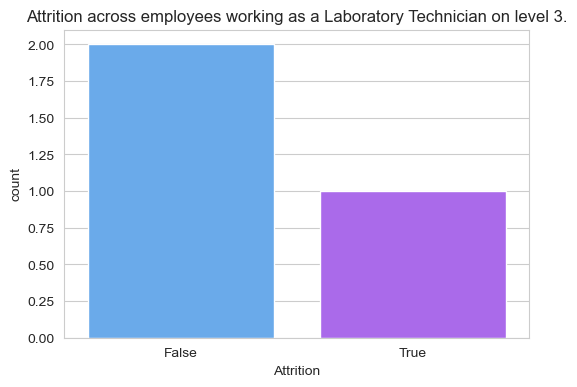

In [4]:
plot_attrition('Laboratory Technician', 3)

Sorry, we do not have enough data to plot attrition statistics for your job level.
Now showing general statistics for employees working as a Manager.


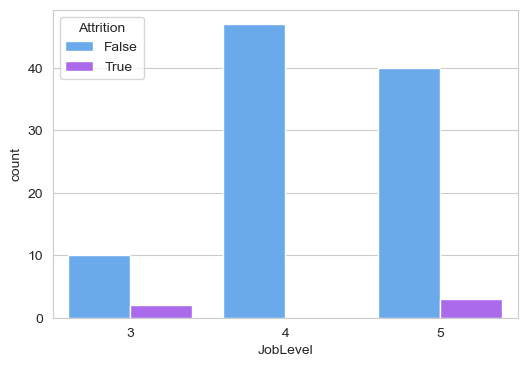

In [5]:
plot_attrition('Manager', 2)

In [6]:
def attrition_rankings(job_role: str):

    df1 = df[(df['JobRole'] == job_role) & (df['Attrition'] == True)]
        
#     filtrowanie pojedynczych rekordow
    df1 = df1.groupby('JobLevel').filter(lambda x: x.shape[0] > 4)
    
    plt.figure(figsize=(6, 2))
    sns.set_style('whitegrid')
    sns.boxplot(x='Age', y='JobLevel', data=df1, orient='h', palette='cool')
    plt.title('Employee attrition, age distribution')
    
    plt.figure(figsize=(6, 2))
    sns.set_style('whitegrid')
    sns.boxplot(x='MonthlyIncome', y='JobLevel', data=df1, orient='h', palette='cool')
    plt.title('Employee attrition, salary distribution')
    
    plt.show()

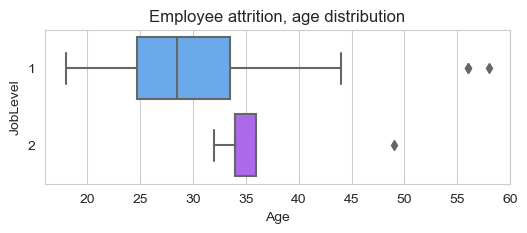

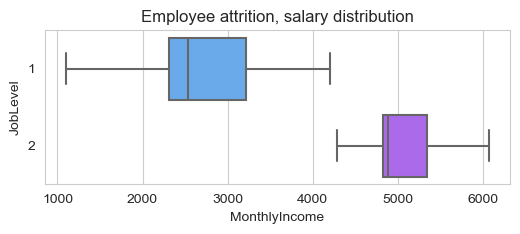

In [7]:
attrition_rankings('Laboratory Technician')